In [188]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#Import csv data and use Pandas to create a Data Frame
cleaned_df = pd.read_csv("../Resources/Cleaned_CVD.csv")


In [189]:
cleaned_df.head()

,Unnamed: 0,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,0,Poor,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,Very Good,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,Good,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [190]:
#Group by Heart Disease Status
grouped_df = cleaned_df.groupby(["Heart Disease"])
grouped_df.count()


,Unnamed: 0,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,,
No,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883
Yes,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971


#Question: Is there a trend between different genders that exercise and the rate of those that have heart disease?

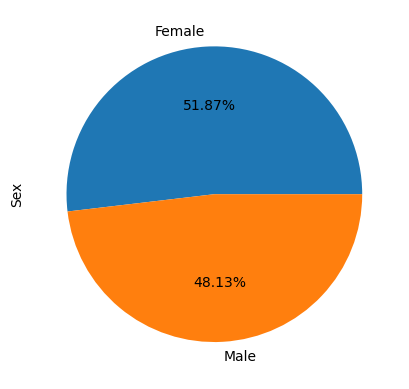

In [191]:
# Generate a pie plot showing the distribution of females versus males that took the survey
gender_percent= cleaned_df['Sex'].value_counts()
gender_percent.plot(kind='pie', autopct="%.2f%%")

plt.show()

In [192]:
#create a reduced data frame with just the females


female_df=cleaned_df.loc[cleaned_df['Sex']== "Female"]
female_heart=female_df.groupby(['Heart Disease']).count()

female_heart.head()

,Unnamed: 0,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,,
No,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298
Yes,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898


In [193]:
#create a reduced data frame with just the females

female_df=cleaned_df.loc[cleaned_df['Sex']== "Female"]
female_heart=female_df.groupby(['Heart Disease']).count()

#Find the percentage of men that have heart disease
female_yes=female_df.loc[female_df['Heart Disease'] == "Yes"]
female_yes_count=len(female_yes)
female_total=len(female_df)
print(female_total)
female_percent= round((female_yes_count / female_total) * 100,2)
print (f' {female_percent}% of the females in the survey have heart disease.')

#show the grouped female dataframe
female_heart.head()

160196
 6.18% of the females in the survey have heart disease.


,Unnamed: 0,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,,
No,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298
Yes,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898


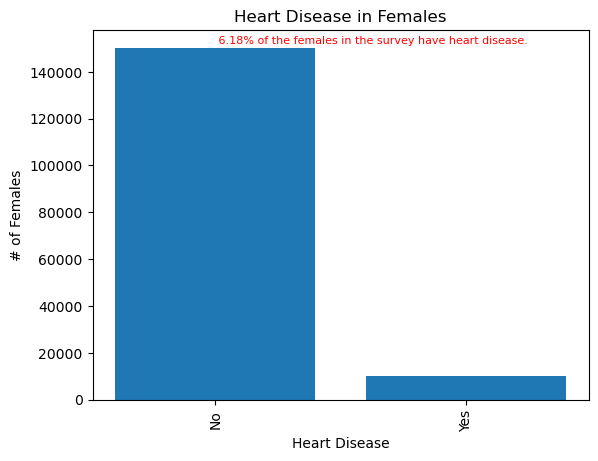

In [194]:
#Create a bar chart that compares the number of females with heart disease to the number of females without heart disease
female_chart= female_df['Heart Disease'].value_counts()
plt.bar(female_chart.index.values,female_chart.values)
plt.xlabel('Heart Disease')
plt.ylabel('# of Females')
plt.xticks(rotation=90)
plt.title("Heart Disease in Females")
plt.annotate(f' {female_percent}% of the females in the survey have heart disease.', (0,152000), color='r', fontsize=8)
#Show the chart
plt.show()


In [195]:
#Save the final graph

plt.savefig("Images/females_vs_heart_disease.png")

<Figure size 640x480 with 0 Axes>

In [196]:
#create a reduced data frame with just the males

male_df=cleaned_df.loc[cleaned_df['Sex']== "Male"]
male_heart=male_df.groupby(['Heart Disease']).count()

#Find the percentage of men that have heart disease
male_yes=male_df.loc[male_df['Heart Disease'] == "Yes"]
male_yes_count=len(male_yes)
male_total=len(male_df)
print(male_total)
male_percent= round((male_yes_count / male_total) * 100,2)
print (f'There were {male_percent}% of males in the survey that have heart disease.')

#show the grouped male dataframe
male_heart.head()

148658
There were 10.14% of males in the survey that have heart disease.


,Unnamed: 0,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,,
No,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585
Yes,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073


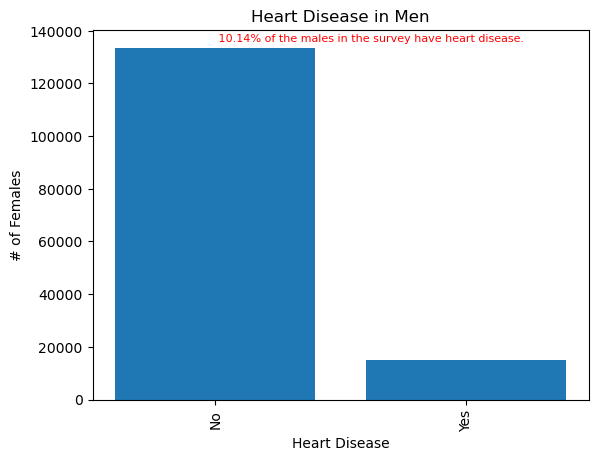

In [197]:
#Create a bar chart that compares the number of males with heart disease to the number of males without heart disease
male_chart= male_df['Heart Disease'].value_counts()
plt.bar(male_chart.index.values,male_chart.values)
plt.xlabel('Heart Disease')
plt.ylabel('# of Females')
plt.xticks(rotation=90)
plt.title("Heart Disease in Men")
plt.annotate(f' {male_percent}% of the males in the survey have heart disease.', (0,136000), color='r', fontsize=8)
#Show the chart
plt.show()

In [198]:
#Save the final graph

plt.savefig("Images/males_vs_heart_disease.png")

<Figure size 640x480 with 0 Axes>

In [199]:
#People that exercise and look at people that have heart disease vs people that dont

In [200]:
#Create a reduced dataframe including only the people that exercise

exercisers=cleaned_df.loc[cleaned_df['Exercise']== 'Yes']
exercisers

,Unnamed: 0,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
2,2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
6,6,Fair,<1,Yes,Yes,No,No,No,None,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,7,Good,<1,Yes,No,No,No,No,None,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
10,10,Fair,<1,Yes,Yes,No,No,No,None,Yes,Female,75-79,160.0,74.84,29.23,No,0.0,30.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,308849,Very Good,<1,Yes,No,No,No,No,None,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,308850,Fair,<5,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,308851,Very Good,5+,Yes,No,No,No,Yes,Pregnacy-Induced,No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,308852,Very Good,<1,Yes,No,No,No,No,None,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [201]:
#Create a sub dataframe for people that exercise and also have heart disease
#Do the same for the people that exercise and do not have heart disease

exercise_yes=exercisers.loc[exercisers['Heart Disease']== 'Yes']
exercise_no=exercisers.loc[exercisers['Heart Disease']== 'No']

#Count the number of people in each group

exercise_hd_count=exercise_yes.count()
exercise_no_hd_count=exercise_no.count()

has_hd=exercise_hd_count["Heart Disease"]
no_hd=exercise_no_hd_count["Heart Disease"]
has_hd

15967

In [202]:
#save the data in a new pandas dictionary

subpop_heart_disease={
        "Exercise":has_hd,"No Exercise":no_hd

}
                                     
subpop_heart_disease

{'Exercise': 15967, 'No Exercise': 223414}

In [203]:
#create your variables for your graph

groups=list(subpop_heart_disease.keys())
count=list(subpop_heart_disease.values())

Text(0, 0.5, '# of people with heart disease')

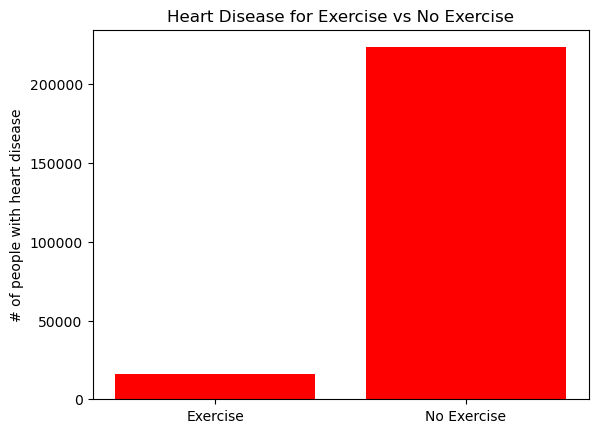

In [204]:
# Graph the results


plt.bar(range(len(subpop_heart_disease)), count, tick_label=groups, color='r')

# Set a Title and labels
plt.title("Heart Disease for Exercise vs No Exercise")
plt.ylabel("# of people with heart disease")



In [205]:
#Save the final graph

plt.savefig("Images/exercise_vs_heart_disease.png")

<Figure size 640x480 with 0 Axes>